# Red-Wine quality prediction

### Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, boxcox

import collections
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import *

### Load Data

In [2]:
data = pd.read_csv('/content/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
print("Data Shape --> ",data.shape)

Data Shape -->  (1599, 12)


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### EDA

### fixed acidity

In [8]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 8.31963727329581, sigma fixed acidity : 1.7405518001102729


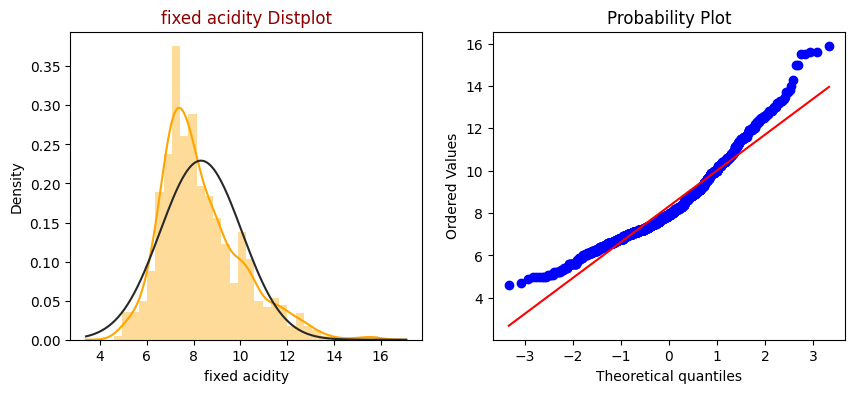

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["fixed acidity"], plot = plt)
plt.show()

In [10]:
data["fixed acidity"], lam_fixed_acidity = boxcox(data["fixed acidity"])

In [11]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 1.124655731469057, sigma fixed acidity : 0.048378082803535


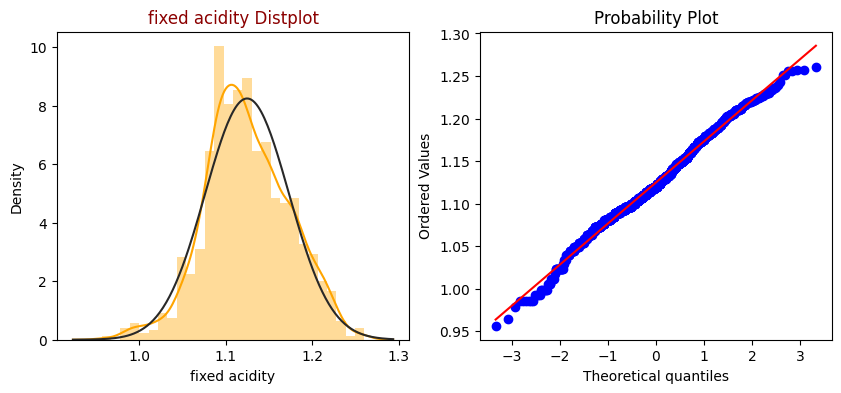

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["fixed acidity"], plot = plt)
plt.show()

#### residual sugar

In [13]:
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 2.53880550343965, sigma residual sugar : 1.4094871124880495


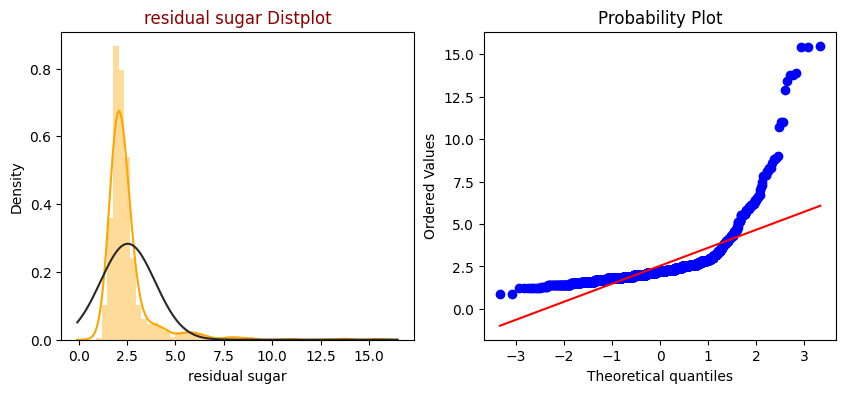

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()

In [15]:
data["residual sugar"], lam_fixed_acidity = boxcox(data["residual sugar"])

In [16]:
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 0.5135558435839319, sigma residual sugar : 0.11004598444169933


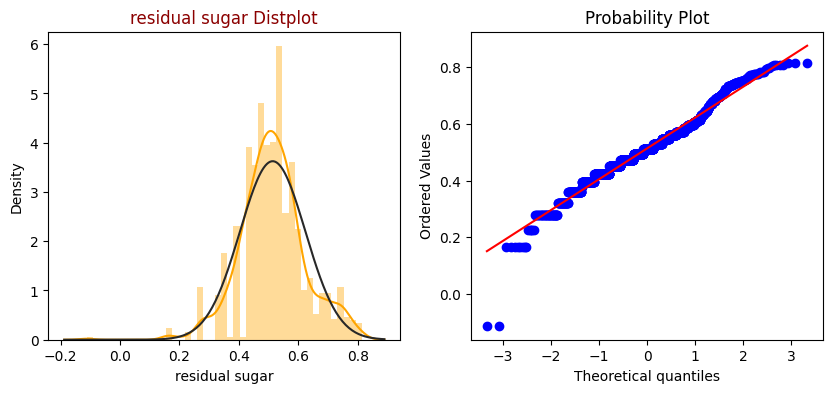

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()

#### free sulfur dioxide

In [18]:
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 15.874921826141339, sigma free sulfur dioxide : 10.45688561493072


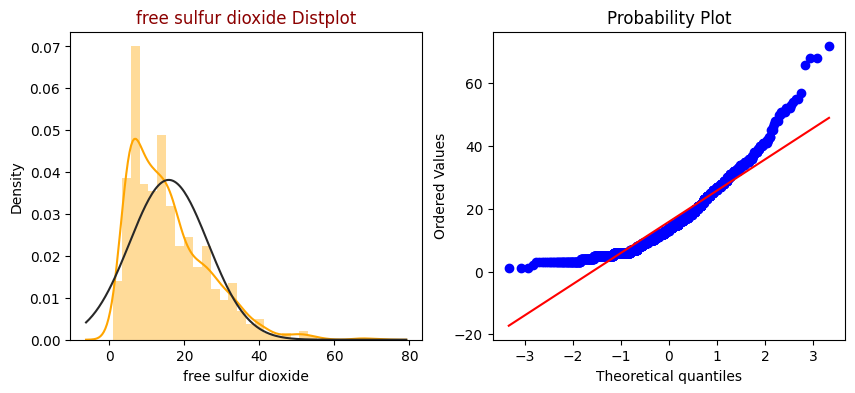

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

In [20]:
data["free sulfur dioxide"], lam_fixed_acidity = boxcox(data["free sulfur dioxide"])

In [21]:
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 3.1290485296425143, sigma free sulfur dioxide : 0.9855086968773705


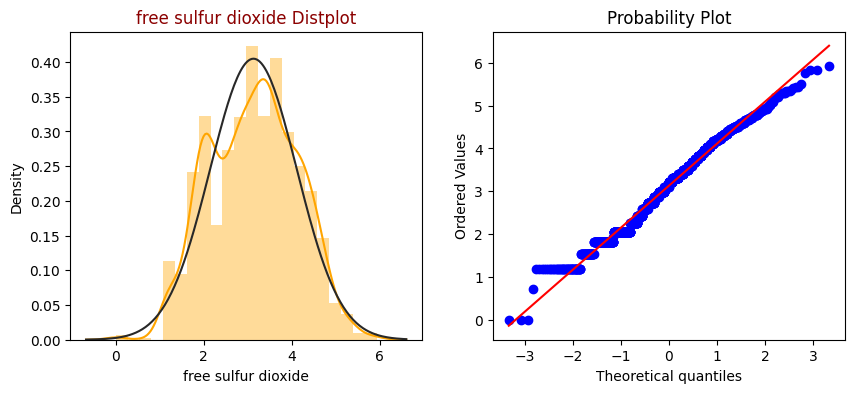

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

#### total sulfur dioxide

In [23]:
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 46.46779237023139, sigma total sulfur dioxide : 32.88503665178374


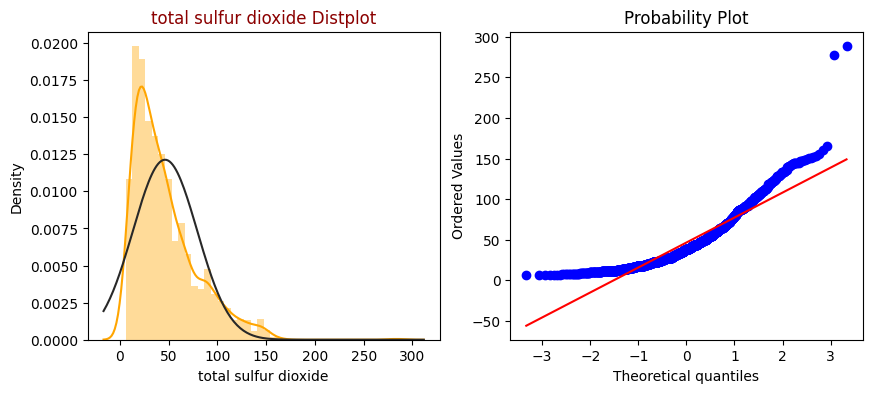

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

In [25]:
data["total sulfur dioxide"], lam_fixed_acidity = boxcox(data["total sulfur dioxide"])

In [26]:
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 3.9657192644535324, sigma total sulfur dioxide : 0.8459104716754929


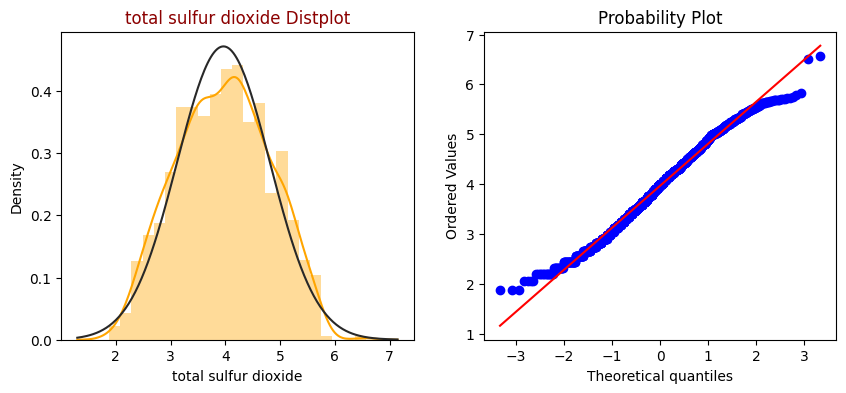

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

#### alcohol

In [28]:
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 10.422983114446529, sigma alcohol : 1.0653343003437483


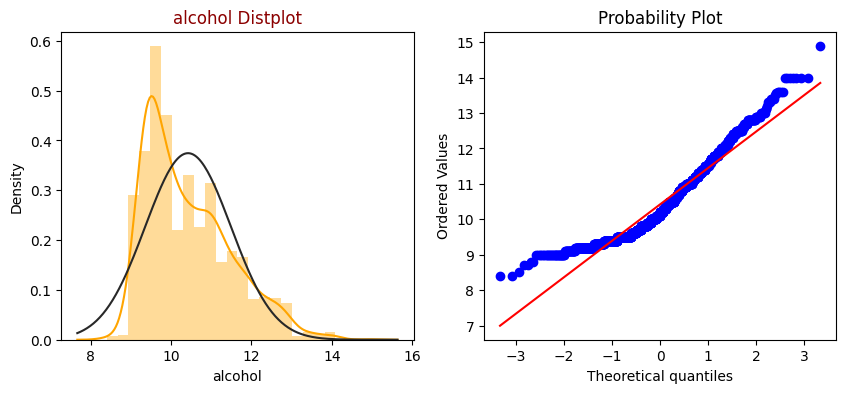

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

In [30]:
data["alcohol"], lam_fixed_acidity = boxcox(data["alcohol"])

In [31]:
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 0.3005237243397624, sigma alcohol : 3.922651387741175e-05


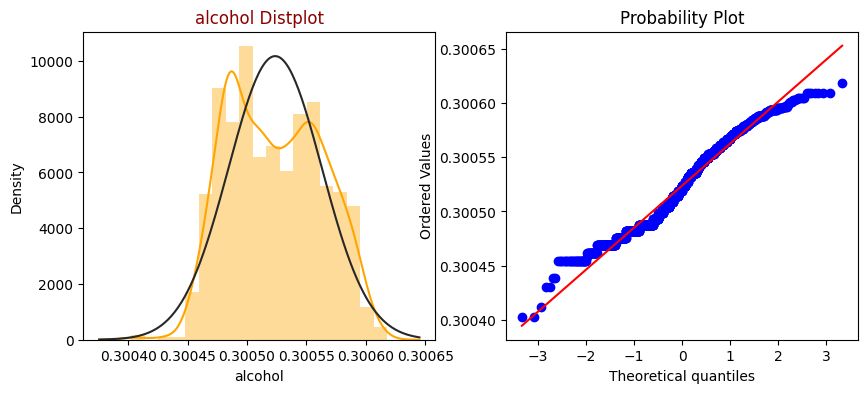

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

### Outlier Detection

In [33]:
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)

        # 3st quartile
        Q3 = np.percentile(df[c],75)

        # IQR
        IQR = Q3 - Q1

        # Outlier Step
        outlier_step = IQR * 1.5

        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [34]:
print("number of outliers detected --> ", len(data.loc[detect_outliers(data, data.columns[:-1])]))

number of outliers detected -->  68


In [35]:
data = data.drop(detect_outliers(data, data.columns[:-1]), axis = 0).reset_index(drop = True)

### Determining Targets

In [36]:
bins = (2, 6.5, 8)

labels = [0, 1]

data['quality'] = pd.cut(x = data['quality'], bins=bins, labels=labels)

Determining the variable quality into 2 variables, 0 and 1

In [37]:
data['quality'].value_counts()

0    1323
1     208
Name: quality, dtype: int64

### Train - Test Split

In [38]:
y = data.quality

x = data.drop(["quality"], axis = 1)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state = 206)

### Smote for unbalanced data

In [40]:
sm = SMOTE(random_state=14)

X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [41]:
print("Before smote --> ", collections.Counter(Y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({0: 1052, 1: 172})
After smote -->  Counter({0: 1052, 1: 1052})


### Normalization

In [42]:
scaler = StandardScaler()

X_train_sm = scaler.fit_transform(X_train_sm)

X_test = scaler.transform(X_test)

### Model Training

In [43]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)

rf.fit(X_train_sm, y_train_sm)

### Model Predictions

In [44]:
y_pred_rf = rf.predict(X_test)

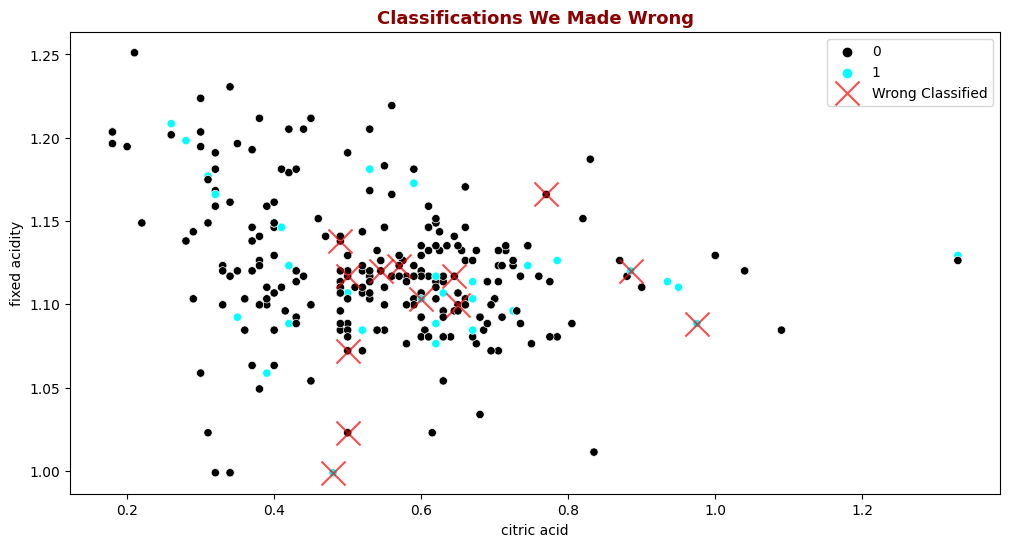

In [45]:
test_data = pd.DataFrame()

test_data["citric acid"] = data["volatile acidity"][:307]
test_data["fixed acidity"] = data["fixed acidity"][:307]

test_data["y_pred_rf"] = y_pred_rf
test_data["Y_test"] = Y_test.values

plt.figure(figsize=(12,6))

sns.scatterplot(x="citric acid", y="fixed acidity", hue="Y_test", data=test_data, palette=["Black","cyan"])

diff = np.where(y_pred_rf!=Y_test)[0]

plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified", marker="x",alpha = 0.7, color = "Red",s = 300)

plt.title("Classifications We Made Wrong", fontsize = 13, fontweight = "bold", color = "darkred")
plt.legend()
plt.show()

### Model Evaluation

In [46]:
cm = confusion_matrix(Y_test, y_pred_rf)

cm

array([[264,   7],
       [  6,  30]])

In [47]:
score = rf.score(X_test, Y_test)

print("Score : ", score)

Score :  0.9576547231270358


In [48]:
acc = accuracy_score(Y_test, y_pred_rf)

print("Model Accuracy = ", acc)

Model Accuracy =  0.9576547231270358


In [49]:
print("Classification Report")

print(classification_report(Y_test, y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       271
           1       0.81      0.83      0.82        36

    accuracy                           0.96       307
   macro avg       0.89      0.90      0.90       307
weighted avg       0.96      0.96      0.96       307

